## Comprehensive Analysis of Supermarket Sales Trends: Insights and Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the supermarket sales dataset
sales_data = pd.read_csv('supermarket_sales - Sheet1.csv')
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
# Displaying data types
sales_data.info()# Displaying data types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
# Data Cleaning
# Convert 'Date' to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Check for NaT values which indicate failed conversions
if sales_data['Date'].isnull().any():
    print("Some dates could not be converted. Please check for mixed formats.")

In [4]:
# Label Encoding for categroical variables 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sales_data['Customer type'] = label_encoder.fit_transform(sales_data['Customer type'])
sales_data['Branch'] = label_encoder.fit_transform(sales_data['Branch'])
sales_data['City'] = label_encoder.fit_transform(sales_data['City'])
sales_data['Gender'] = label_encoder.fit_transform(sales_data['Gender'])
sales_data['Product line'] = label_encoder.fit_transform(sales_data['Product line'])
sales_data['Payment'] = label_encoder.fit_transform(sales_data['Payment'])

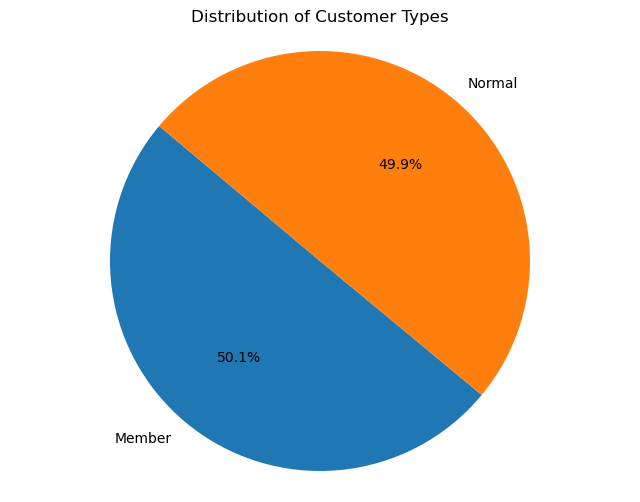

In [5]:
# Pie Chart: Distribution of Customer Types
def plot_pie_chart(data):
    plt.figure(figsize=(8, 6))
    customer_type_counts = data['Customer type'].value_counts()
    plt.pie(customer_type_counts, labels=['Member', 'Normal'], autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Customer Types')
    plt.axis('equal')
    plt.show()

plot_pie_chart(sales_data)

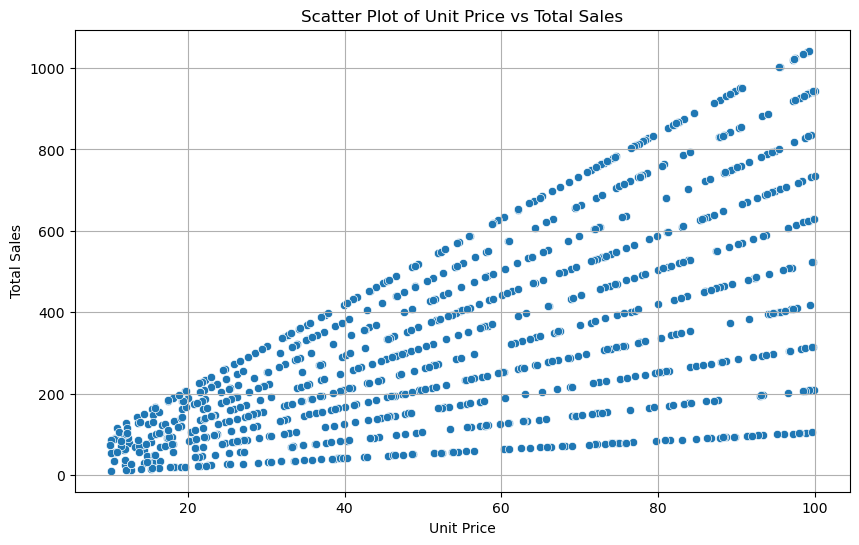

In [6]:
# Scatter Plot: Unit Price vs Total Sales
def plot_scatter_chart(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Unit price', y='Total', data=data)
    plt.title('Scatter Plot of Unit Price vs Total Sales')
    plt.xlabel('Unit Price')
    plt.ylabel('Total Sales')
    plt.grid()
    plt.show()

plot_scatter_chart(sales_data)

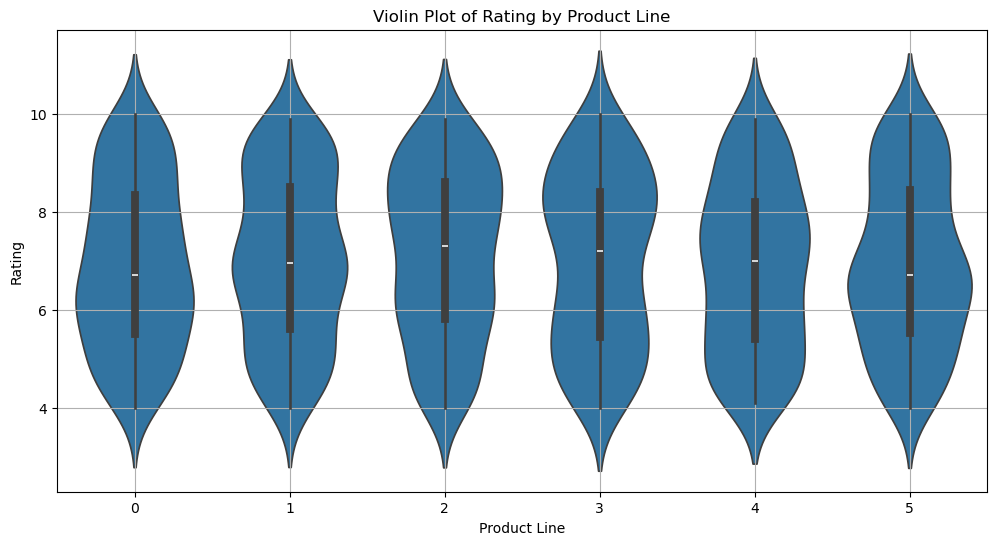

In [7]:
# Violin Plot: Rating by Product Line
def plot_violin_chart(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Product line', y='Rating', data=data)
    plt.title('Violin Plot of Rating by Product Line')
    plt.xlabel('Product Line')
    plt.ylabel('Rating')
    plt.grid()
    plt.show()

plot_violin_chart(sales_data)

In [8]:
# Addition analysis
sales_data.describe()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,0.988000,1.008000,0.499000,0.499000,2.452000,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,1.001000,307.58738,4.761905e+00,15.379369,6.97270
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,0.000000,10.17000,4.761905e+00,0.508500,4.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,0.000000,118.49750,4.761905e+00,5.924875,5.50000
50%,1.000000,1.000000,0.000000,0.000000,2.000000,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,1.000000,241.76000,4.761905e+00,12.088000,7.00000
75%,2.000000,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2.000000,448.90500,4.761905e+00,22.445250,8.50000
max,2.000000,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2.000000,993.00000,4.761905e+00,49.650000,10.00000
std,0.817633,0.820127,0.500249,0.500249,1.715412,26.494628,2.923431,11.708825,245.885335,NaN,0.830475,234.17651,6.131498e-14,11.708825,1.71858
